# **THREADS DATASET ANALYSIS**

Threads is designed to provide a more private and focused communication experience for close friends and contacts. The app is intended to be a companion to Instagram, allowing users to share photos, videos, and status updates specifically with a select group of people from their Instagram friends list. Threads offers features like automatic status updates based on a user's location, activity, and battery life, making it easier to share updates with friends without needing to type out messages.

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading the Data

df = pd.read_csv("threads_reviews.csv")

In [5]:
# Display the first few rows of the dataset

df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [6]:
# Print the shape of the dataset

print("Shape of the dataset: {}".format(df.shape))

Shape of the dataset: (32910, 4)


In [7]:
# Exploratory Data Analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [9]:
df.describe()

,rating
count,32910.000000
mean,3.398481
std,1.751480
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [8]:
# Checking for null values

df.isnull().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

In [10]:
# Convert 'review_date' column to datetime type

df['review_date'] = pd.to_datetime(df['review_date'])

In [12]:
# Feature Engineering

df['date'] = df['review_date'].dt.date
df['year'] = df['review_date'].dt.isocalendar().year
df['month'] = df['review_date'].dt.month
df['week'] = df['review_date'].dt.isocalendar().week
df['day'] = df['review_date'].dt.day


## Data Visualisation

In [13]:
# Visualize trends in reviews per week and per day

review_perweek = df['week'].value_counts().sort_index()
review_perday = df['day'].value_counts().sort_index()

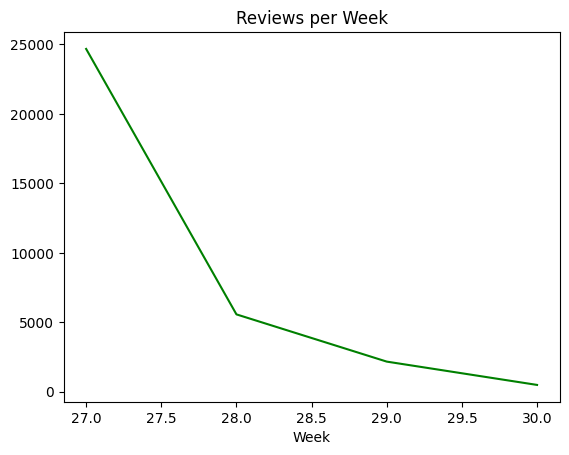

In [14]:
plt.plot(review_perweek.index, review_perweek.values, color='g')
plt.title('Reviews per Week')
plt.xlabel('Week')
plt.show()

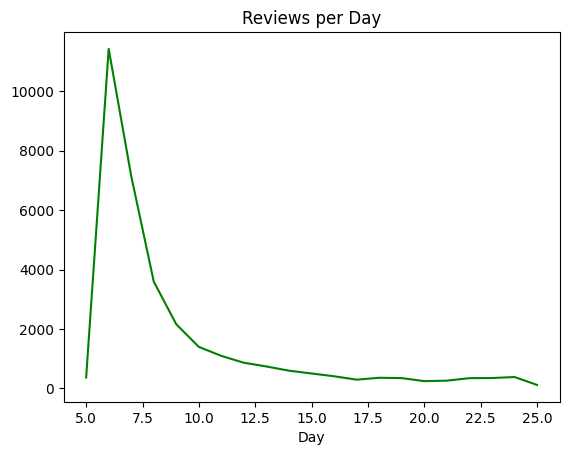

In [15]:
plt.plot(review_perday.index, review_perday.values, color='g')
plt.title('Reviews per Day')
plt.xlabel('Day')
plt.show()

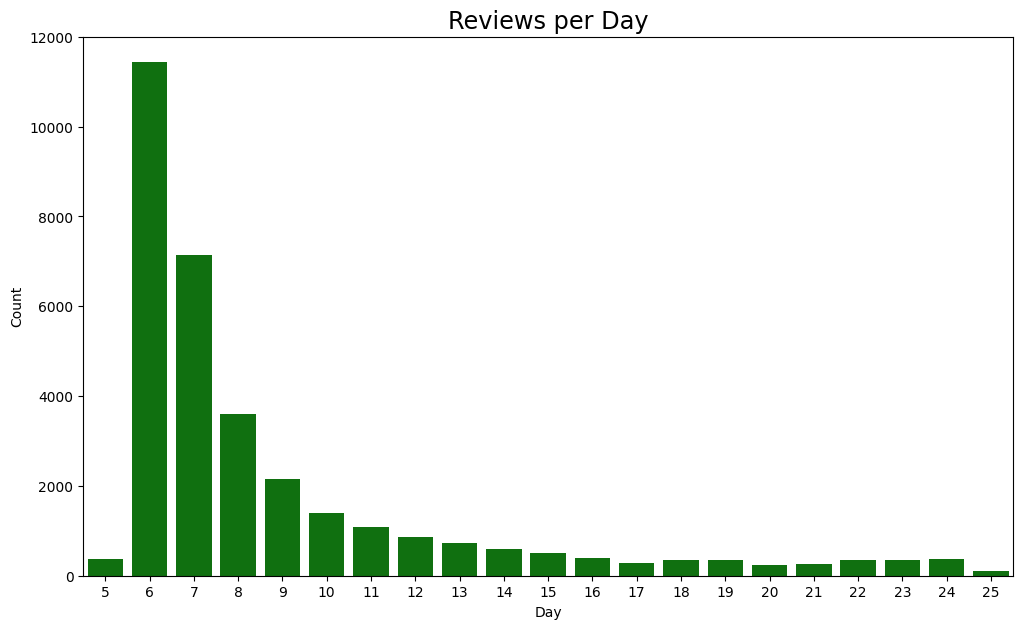

In [17]:
plt.figure(figsize=(12, 7))
sns.barplot(x=review_perday.index, y=review_perday.values, color='g')
plt.title('Reviews per Day', size='xx-large')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

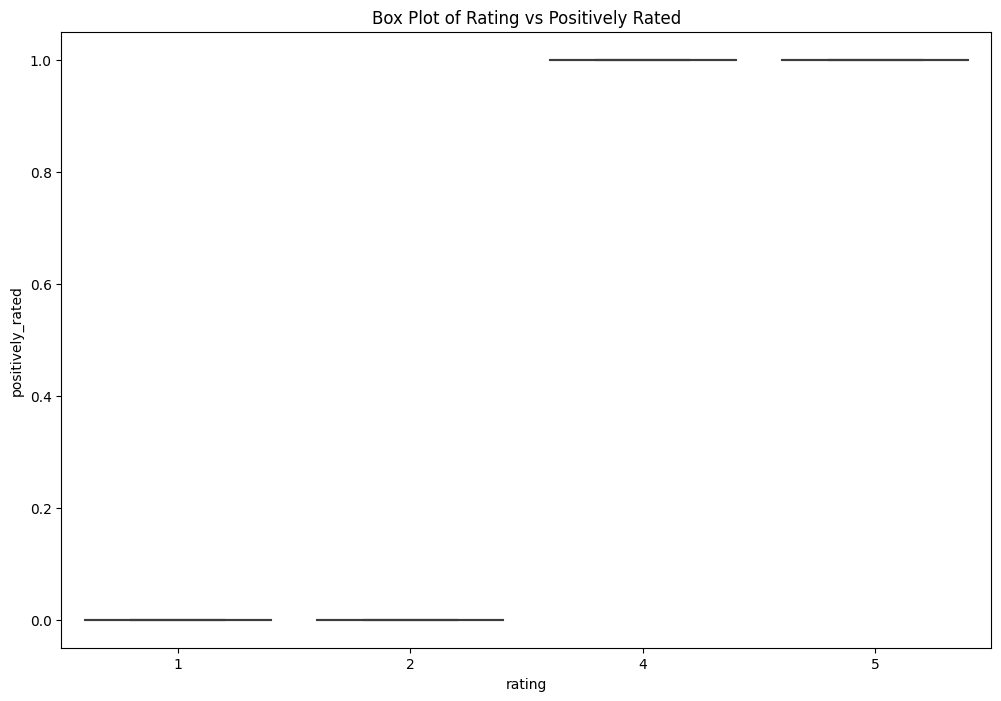

In [36]:
# Box Plots

plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='positively_rated', data=df)
plt.title('Box Plot of Rating vs Positively Rated')
plt.show()

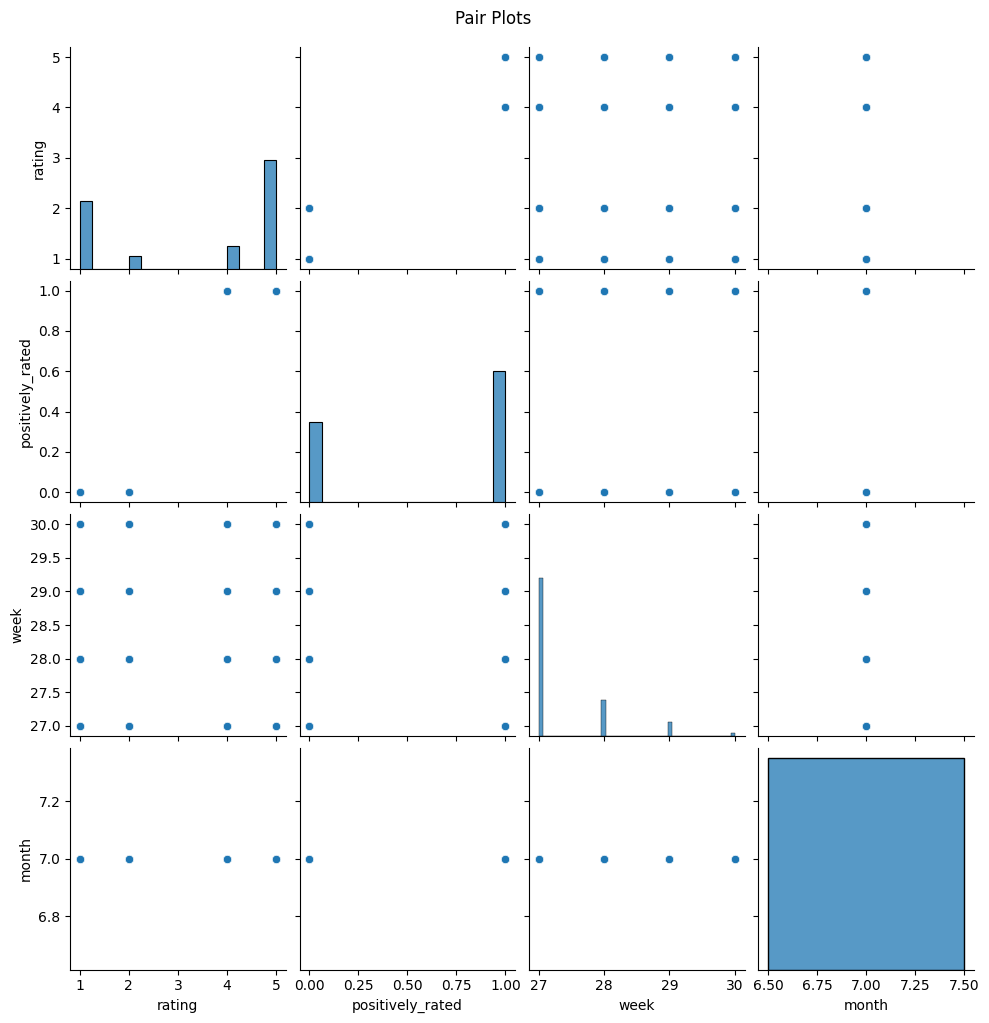

In [38]:
# Pair Plots

sns.pairplot(df[['rating', 'positively_rated', 'week', 'month']], diag_kind='hist')  # Use 'hist' for categorical variables
plt.suptitle('Pair Plots', y=1.02)
plt.show()

In [18]:
# Count of reviews by rating

count_rating = df['rating'].value_counts().sort_values(ascending=False)

<Axes: ylabel='rating'>

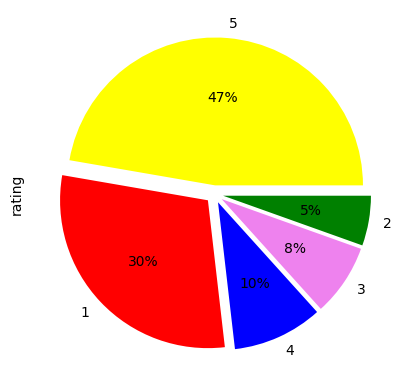

In [19]:
# Plotting pie chart for ratings

colors = ['yellow', 'red', 'blue', 'violet', 'green']
explode = (0.06, 0.06, 0.06, 0.06, 0.06)
count_rating.plot(kind='pie', colors=colors, explode=explode, autopct='%1.0f%%')

<Axes: xlabel='count', ylabel='source'>

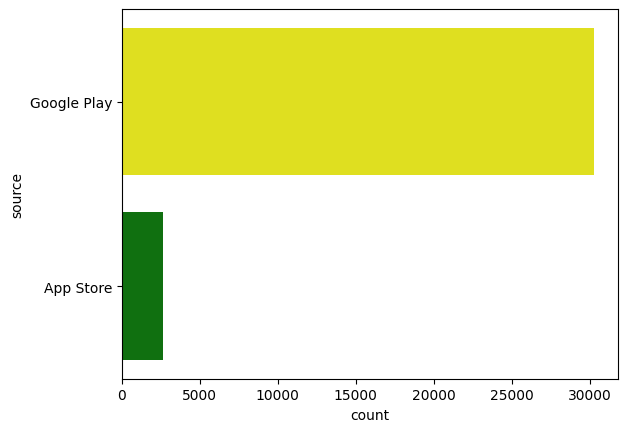

In [20]:
# Count of reviews by source

count_source = df['source'].value_counts().sort_values(ascending=False)
sns.countplot(y='source', data=df, palette=['yellow', 'green'])

In [21]:
# Word Cloud

from wordcloud import WordCloud, STOPWORDS
stopword = set(STOPWORDS)

In [22]:
text = ' '.join(df['review_description'])
word_cloud = WordCloud(collocations=False, background_color='white',
                       max_words=50, stopwords=stopword, min_word_length=4,
                       width=2048, height=1080).generate(text)

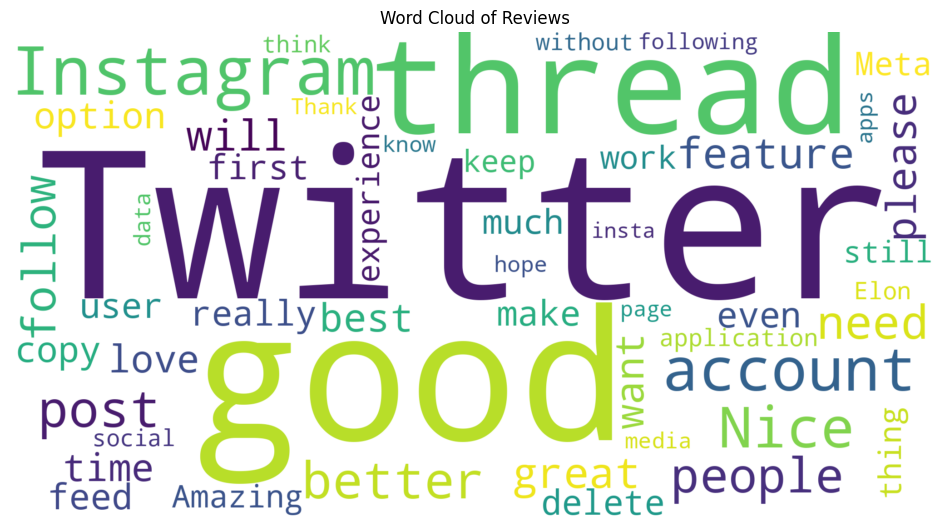

In [23]:
plt.figure(figsize=(12, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

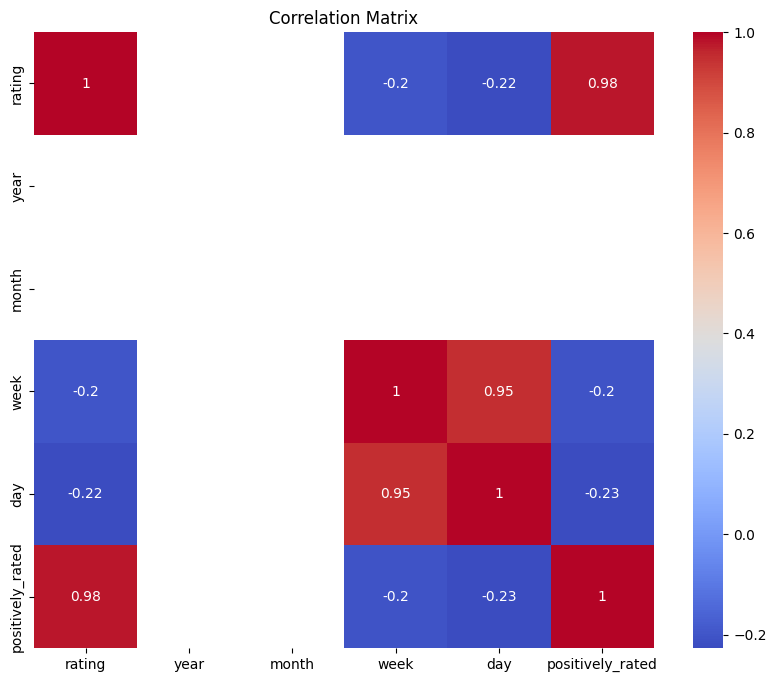

In [35]:
# Correlation Matrix

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
# Data Preparation

df = df[df['rating'] != 3]
df['positively_rated'] = np.where(df['rating'] > 3, 1, 0)

In [25]:
# Train-test split

from sklearn.model_selection import train_test_split

In [26]:
X = df['review_description']
y = df['positively_rated']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
# Vectorization - CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

In [28]:
vect1 = CountVectorizer(min_df=3, ngram_range=(1, 2)).fit(X_train)
X_train_vectorized1 = vect1.transform(X_train)

In [29]:
# Model Building and Evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [30]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train_vectorized1, y_train)
predictions1 = model1.predict(vect1.transform(X_test))
print('AUC with CountVectorizer: ', roc_auc_score(y_test, predictions1))

AUC with CountVectorizer:  0.854333739700155


In [32]:
# Vectorization - TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vect2 = TfidfVectorizer().fit(X_train)
X_train_vectorized2 = vect2.transform(X_train)

In [33]:
# Model Building and Evaluation

model2 = LogisticRegression(max_iter=10000)
model2.fit(X_train_vectorized2, y_train)
predictions2 = model2.predict(vect2.transform(X_test))
print('AUC with TF-IDF: ', roc_auc_score(y_test, predictions2))

AUC with TF-IDF:  0.846531333157027


In [34]:
# Interpretation of Coefficients

feature_names = np.array(vect1.get_feature_names_out())
sorted_coef_index = model1.coef_[0].argsort()
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs:\n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['worst' 'useless' 'boring' 'not good' 'garbage' 'poor' 'bad' 'copy'
 'bakwas' 'copycat']

Largest Coefs:
['not bad' 'awesome' 'great' 'excellent' 'nice' 'good' 'cool' 'amazing'
 'super' 'wonderful']
